In [1]:
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
np.random.seed(302)

# Conceptual Exercises
## Non-linear Separation
### 1.

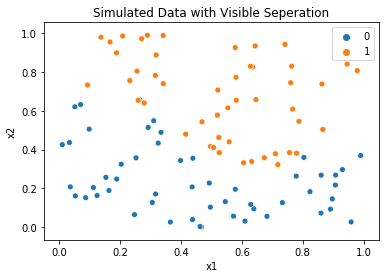

In [3]:
df = pd.DataFrame(np.random.rand(100, 2), columns=('x1', 'x2'))
y = np.int64(df.x1**2 + df.x2 / 3  -  df.x1**3 > .25)
sns.scatterplot(x='x1', y='x2', hue=y, data=df)
plt.legend(loc='upper right')
plt.title('Simulated Data with Visible Seperation')
plt.show()
x_tr, x_te, y_tr, y_te = train_test_split(df, y, train_size=.75)


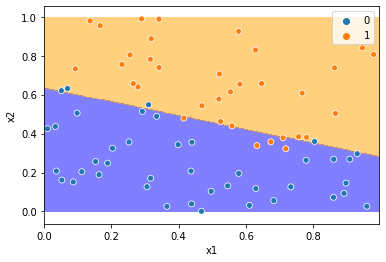

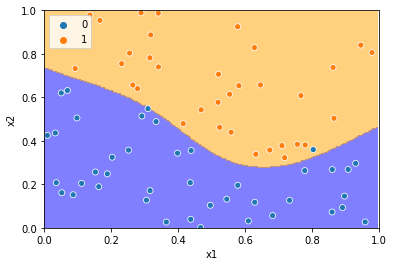

The Linear Classification has a train accuracy of 0.88 and a test accuracy of 0.8
The Radial Classification has a train accuracy of 0.9866666666666667 and a test accuracy of 1.0


In [4]:
sc_lin = SVC(kernel='linear')
sc_lin.fit(x_tr, y_tr)
sc_rad = SVC(kernel='rbf')
sc_rad.fit(x_tr, y_tr)

gridspace = np.arange(0, 1, .005)
x1_p, x2_p = np.meshgrid(gridspace, gridspace)
zz_lin = sc_lin.predict(np.c_[x1_p.ravel(), x2_p.ravel()]).reshape(x1_p.shape)
zz_rad = sc_rad.predict(np.c_[x1_p.ravel(), x2_p.ravel()]).reshape(x1_p.shape)


plt.contourf(x1_p, x2_p, zz_lin, colors=['blue', 'orange'], levels=1, alpha=.5)
sns.scatterplot(x='x1', y='x2', data=x_tr, hue=y_tr)
plt.show()

plt.ylim(0, 1)
plt.xlim(0, 1)
plt.contourf(x1_p, x2_p, zz_rad, colors=['blue', 'orange'], levels=1, alpha=.5)
sns.scatterplot('x1', 'x2', data=x_tr, hue=y_tr)
plt.show()

lin_acc_tr = sc_lin.score(x_tr, y_tr)
lin_acc_te = sc_lin.score(x_te, y_te)
rad_acc_tr = sc_rad.score(x_tr, y_tr)
rad_acc_te = sc_rad.score(x_te, y_te)

print(f'The Linear Classification has a train accuracy of {lin_acc_tr} and a test accuracy of {lin_acc_te}')

print(f'The Radial Classification has a train accuracy of {rad_acc_tr} and a test accuracy of {rad_acc_te}')

The Radial kernel works better on both the train and test data. This makes sense considering the fact that we generated the data to have a non-linear separation, so a linear classifier couldn't possibly capture the ground-truth.

## SVM vs. Logistic Regression
### 2. / 3.

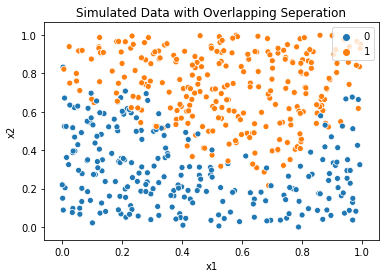

In [5]:
# 2
df = pd.DataFrame(np.random.rand(500, 2), columns=('x1', 'x2'))
y = np.int64(df.x1**2 + df.x2 / 3  -  df.x1**3 + np.random.uniform(-.05, .05, 500)> .25)
# 3
sns.scatterplot(x='x1', y='x2', hue=y, data=df)
plt.legend(loc='upper right')
plt.title('Simulated Data with Overlapping Seperation')
plt.show()

### 4. / 5.

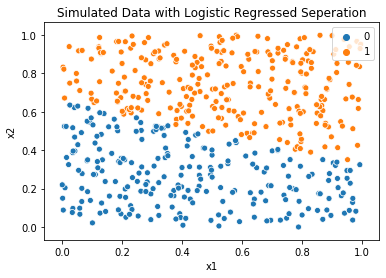

In [6]:
# 4
logit = LogisticRegression()
logit.fit(df, y)
# 5
sns.scatterplot(x='x1', y='x2', hue=logit.predict(df), data=df)
plt.legend(loc='upper right')
plt.title('Simulated Data with Logistic Regressed Seperation')
plt.show()

### 6. / 7.

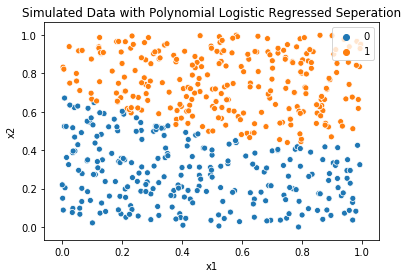

In [7]:
# 6
polylog = Pipeline([('poly', PolynomialFeatures(degree=3)),
                    ('logit', LogisticRegression())])

polylog.fit(df, y)
# 7
sns.scatterplot(x='x1', y='x2', hue = polylog.predict(df), data=df)
plt.legend(loc='upper right')
plt.title('Simulated Data with Polynomial Logistic Regressed Seperation')
plt.show()


### 8.

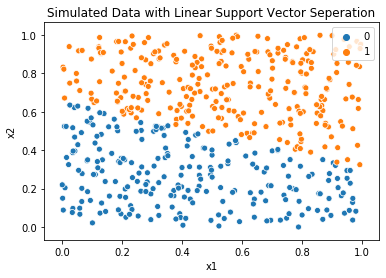

In [8]:
sc_lin = SVC(kernel='linear')
sc_lin.fit(df, y)
sns.scatterplot(x='x1', y='x2', hue = sc_lin.predict(df), data=df)
plt.legend(loc='upper right')
plt.title('Simulated Data with Linear Support Vector Seperation')
plt.show()

### 9.

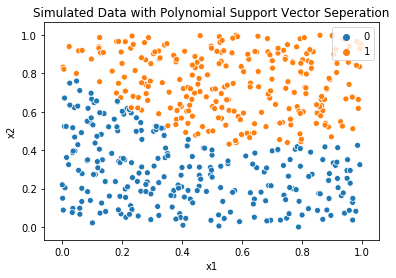

In [9]:
sc_poly = SVC(kernel='poly')
sc_poly.fit(df, y)
sns.scatterplot(x='x1', y='x2', hue = sc_poly.predict(df), data=df)
plt.legend(loc='upper right')
plt.title('Simulated Data with Polynomial Support Vector Seperation')
plt.show()

### 10.

We see primarily that using these methods gets roughly the same result in the linear case, but the support vector machine works a little better when we allow for a polynomial kernel. Note that even though we allowed the regression to use polynomial features out to the third degree, it still performs worse than a polynomial support vector machine. This is likely due to the fact that the error term in the data generation can affect a logistic regression in a way that it can't affect a support vector machine. 

## Tuning Cost
### 11.



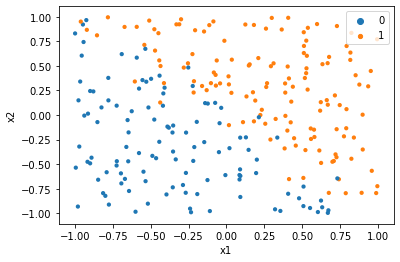

In [10]:
x = pd.DataFrame(np.random.uniform(-1, 1, (250, 2)), columns=('x1', 'x2'))
y = np.int64(x.x1 + x.x2 + np.random.uniform(-.4, .4, 250)> 0)
sns.scatterplot(x='x1', y='x2', hue=y, data=x, linewidth=0, size =1)
plt.show()


### 12.
Note that `"C"` in sklearn is the regularization parameter, and serves the same role as `cost` in caret.

In [11]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y) # Default is 25/75 split
sc_lin = GridSearchCV(SVC(kernel='linear'), {'C': np.linspace(1, 100, 100)}, 
cv=10, refit=True, verbose=1, n_jobs=-1)
sc_lin.fit(x_tr, y_tr);


Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 800 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.7s finished


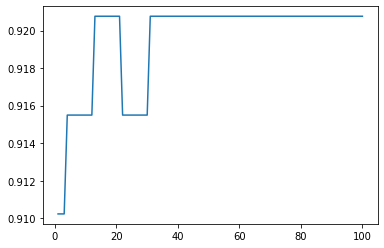

In [12]:
cost = sc_lin.param_grid['C']
errs = sc_lin.cv_results_['mean_test_score']
sns.lineplot(cost, errs);

The accuracy on the training set gets better with increasing cost, somewhat, but it's a little murky.

### 13.


100%|██████████| 100/100 [00:00<00:00, 511.44it/s]


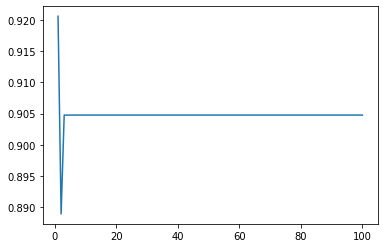

In [13]:
te_errs = []
# I know it isn't horribly efficient to train it again, but waiting the whatever 5 seconds is 
# more time-efficient for me than going through the roughly 20 minutes of redoing the earlier 
# questions using KFold instead of GridSearchCV.

for c in tqdm(cost):
    mod = SVC(kernel='linear', C=c)
    mod.fit(x_tr, y_tr)
    err = mod.score(x_te, y_te)
    te_errs.append(err)

sns.lineplot(cost, te_errs);

We see test accuracy goes down quite a bit when cost increases. This is likely because when there's a higher cost, support vector classifiers are more prone to overfitting. This tells us that higher cost SVMs have a lower bias but a higher variance, and vice versa.

# Application
### 15.

In [2]:
gss_tr = pd.read_csv('./data/gss_train.csv')
gss_te = pd.read_csv('./data/gss_test.csv')
x_tr = gss_tr.drop('colrac', axis=1)
y_tr = gss_tr.colrac
x_te = gss_te.drop('colrac', axis=1)
y_te = gss_te.colrac

In [22]:
sc = GridSearchCV(SVC(kernel='linear'), {'C': range(1, 10)}, refit=True, cv=10, n_jobs=-1, verbose=2)
sc.fit(x_tr, y_tr);


Fitting 10 folds for each of 9 candidates, totalling 90 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  2.0min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1, param_grid={'C': range(1, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

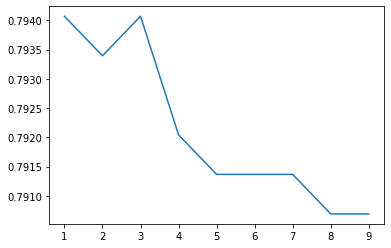

In [25]:
sns.lineplot(sc.param_grid['C'], sc.cv_results_['mean_test_score']);

We see training accuracy decreases slightly as we increase cost. 

In [9]:
params = {'C': range(1, 5), 
          'kernel': ['poly', 'rbf'],
          'degree': [2, 3, 4],
          'gamma': np.logspace(-4, -3, 10)
          }

sc = GridSearchCV(SVC(), params, refit=True, cv=10, n_jobs=12, verbose=2)
sc.fit(x_tr, y_tr);

Fitting 10 folds for each of 240 candidates, totalling 2400 fits
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    4.5s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:   11.2s
[Parallel(n_jobs=12)]: Done 624 tasks      | elapsed:   22.7s
[Parallel(n_jobs=12)]: Done 989 tasks      | elapsed:   34.4s
[Parallel(n_jobs=12)]: Done 1434 tasks      | elapsed:   50.9s
[Parallel(n_jobs=12)]: Done 1961 tasks      | elapsed:  1.2min
[Parallel(n_jobs=12)]: Done 2400 out of 2400 | elapsed:  1.5min finished


In [28]:
res = sc.cv_results_
res = pd.DataFrame({'C': res['param_C'], 
              'gamma': res['param_gamma'],
              'kernel': res['param_kernel'],
              'degree': res['param_degree'],
              'score': res['mean_test_score']})

res['kernel'] = [k + ' ' + str(d) if k == 'poly' else k 
                    for k, d in zip(res['kernel'], res['degree'])]

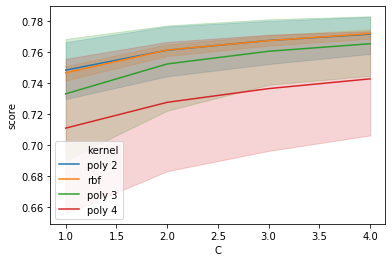

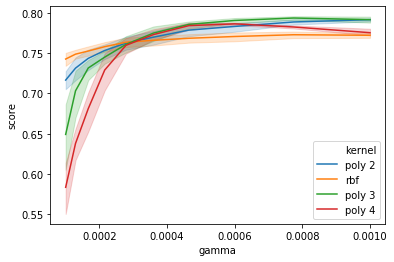

In [31]:
sns.lineplot(x='C', y='score', hue='kernel', data=res)
plt.show()
sns.lineplot(x='gamma', y='score', hue='kernel', data=res)
plt.show()

The thing we notice first is that higher degree polynomials are more sensitive to gamma, and radial kernels are insensitive to gamma. We alsso see that the radial kernel and the lower degree polynomial kernel outperform the higher degree polynomial kernels for all cost. In general performance is more sensitive to gamma than cost.